# Ejercicios - Clase 11

Ejercicios de los bloques de introducción a python. Series temporales

**Versión**: 1.0

**Fecha**: 04/11/2023

En este notebook vamos a trabajar con datos reales OHCL utilizando la librería `yfinance`.

In [1]:
# !pip install yfinance # Es necesario instalar la librería en colab: descomenta el !pip install
# !pip install mplfinance # Es necesario instalar la librería en colab: descomenta el !pip install
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime

Antes de nada, ¿qué representan los datos OHLC? 

- Open: Precio de apertura del activo financiero
- High: Precio máximo del activo financiero
- Low: Precio mínimo del activo financiero
- Close: Precio de cierre del activo financiero

Una vez sabemos esto, vamos a descargar los datos reales de Amazon desde el 1 de enero de 2010 hasta hoy mismo. Para ello, utilizaremos la librería `yfinance` utilizando el ticker `AMZN`. Para más información ver [Yahoo finance](https://finance.yahoo.com/lookup?s=+LIST).

In [26]:
start_date = '2010-01-01'
end_date = datetime.now()

AMAZON_OHLC = yf.download(tickers="AMZN", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


Veamos el aspecto de lo que hemos descargado:

In [27]:
AMAZON_OHLC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400


Visualicemos los datos, por ejemplo, el close ajustado a lo largo del tiempo:

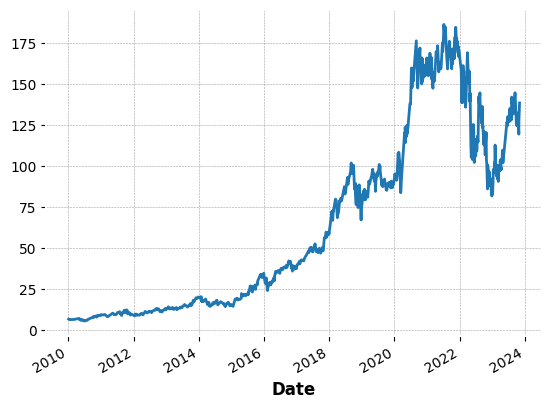

In [28]:
AMAZON_OHLC["Adj Close"].plot()
plt.show()

Sin embargo, es mucho más común y útil visualizar esta misma información con un gráfico de velas. Aquí es cuando utilizamos la librería `mplfinance`. Visualicemos los datos de Amazon del año 2018 utilizando esta librería.

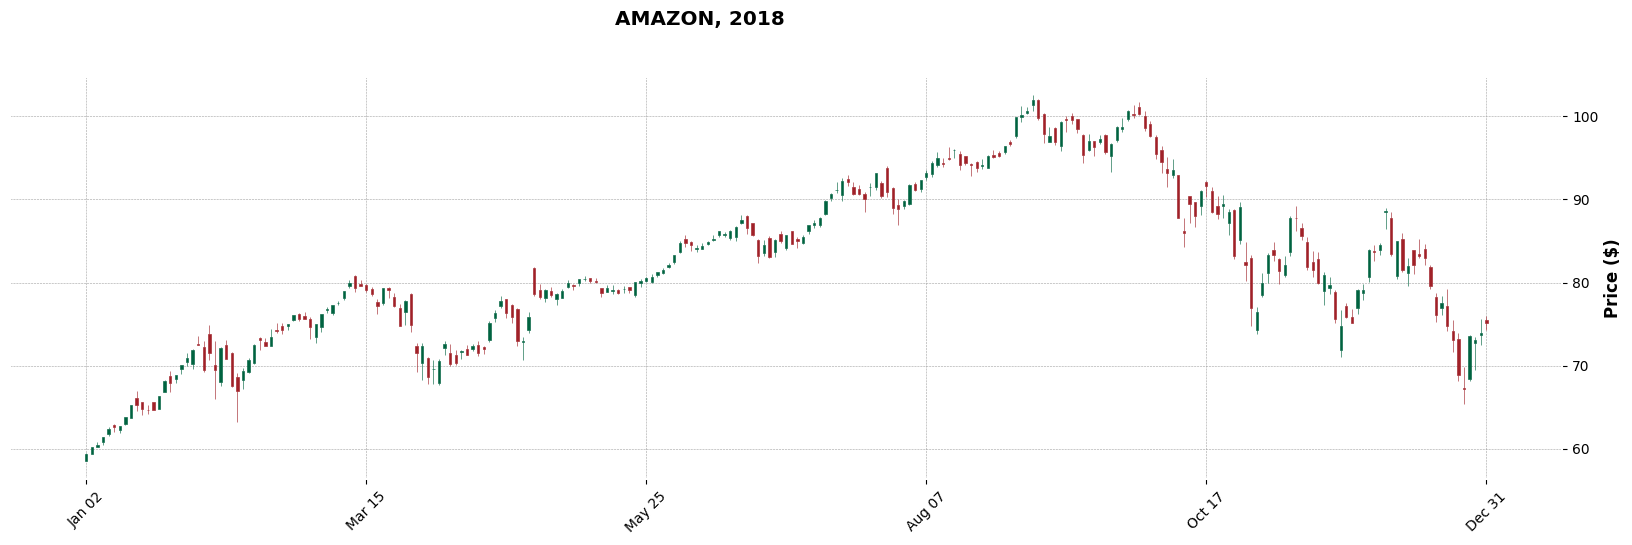

In [29]:
mpf.plot(AMAZON_OHLC.loc['2018'], #seleccionamos los datos de 2018
         type='candle', #tipo de gráfico
         style='charles', #estilo del gráfico
         title='AMAZON, 2018',
         ylabel='Price ($)',
         figratio=(30, 8), #tamaño del gráfico
         )

## Ejercicio 1

Vamos a intentar definir un indicador de tendencia utilizando simplemente el promedio de los retornos en ventanas móviles de diferente amplitud. Supongamos la siguiente hipótesis:

  *Si en los últimos N días tengo un retorno promedio positivo, tengo una tendencia positiva*

Primero, calcula los retornos logarítmicos de Amazon. Luego, crea ventanas móviles de tamaño 5, 10 y 30 y compara las tendencias. 

In [30]:
# Calcula los retornos logarítmicos de Amazon y guárdalos en la columna "LogReturn"
AMAZON_OHLC["LogReturn"] = np.log(AMAZON_OHLC['Adj Close']).diff()
AMAZON_OHLC.dropna(inplace=True)
AMAZON_OHLC

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000,0.005883
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000,-0.018282
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000,-0.017160
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000,0.026717
2010-01-11,6.631000,6.640000,6.460500,6.515500,6.515500,175588000,-0.024335
...,...,...,...,...,...,...,...
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,0.038169
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,0.002859
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,0.028955


In [39]:
# Calcula las ventanas móviles de 5 y 10 días y guárdalas en las variables "LogRet@5" y "LogRet@10"
AMAZON_OHLC["LogRet@5"] = AMAZON_OHLC["LogReturn"].rolling(5).mean()
AMAZON_OHLC["LogRet@10"] = AMAZON_OHLC["LogReturn"].rolling(10).mean()
AMAZON_OHLC["LogRet@30"] = AMAZON_OHLC["LogReturn"].rolling(30).mean()
AMAZON_OHLC

,Open,High,Low,Close,Adj Close,Volume,LogReturn,LogRet@5,LogRet@10,LogRet@30
Date,,,,,,,,,,
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000,0.005883,NaN,NaN,NaN
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000,-0.018282,NaN,NaN,NaN
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000,-0.017160,NaN,NaN,NaN
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000,0.026717,NaN,NaN,NaN
2010-01-11,6.631000,6.640000,6.460500,6.515500,6.515500,175588000,-0.024335,-0.005435,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,0.038169,0.009490,0.000121,-0.001778
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,0.002859,0.006926,0.001225,-0.001118
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,0.028955,0.024194,0.006694,0.000419


Por último visualizamos el Close ajustado en el año 2012:

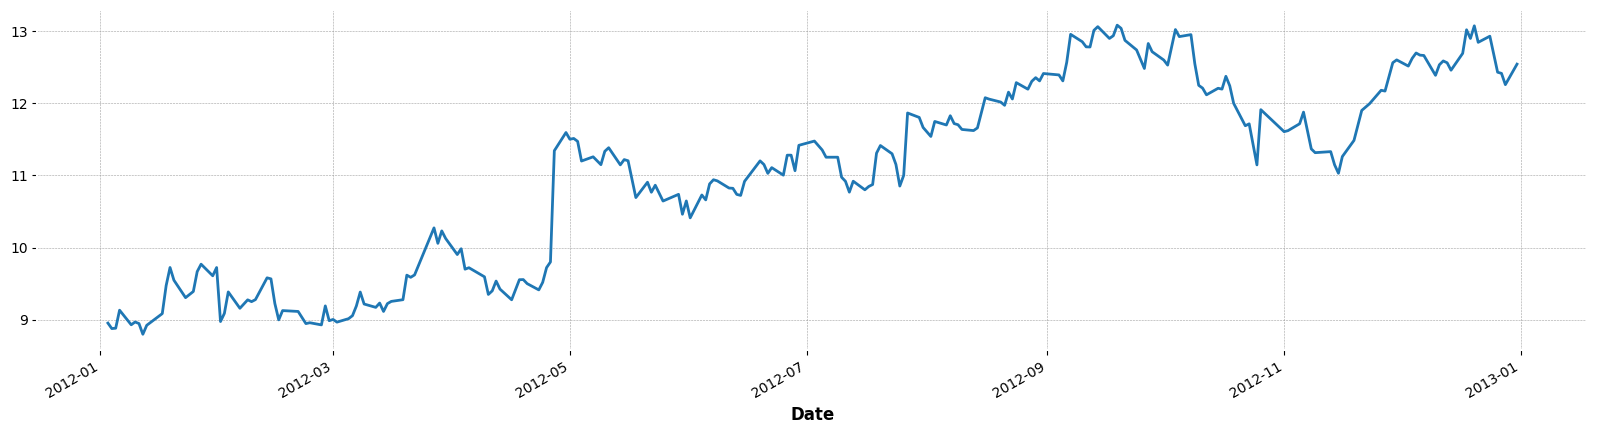

In [42]:
AMAZON_OHLC["Adj Close"].loc["2012"].plot(figsize=(20, 5))
plt.show()

Y comparamos con las métricas de tendencia que has calculado.

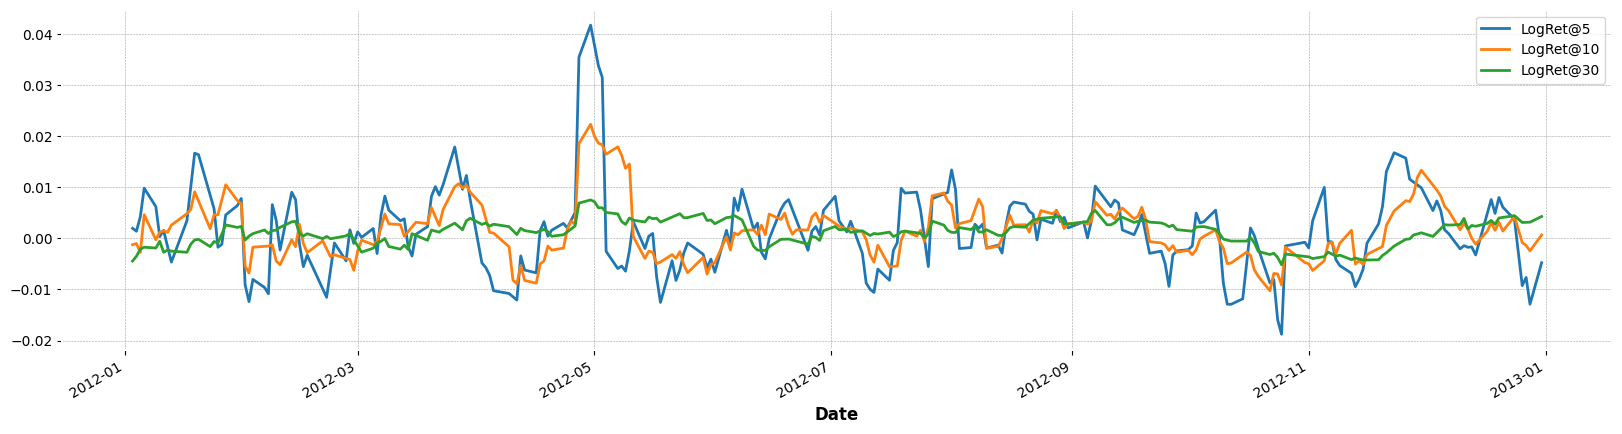

In [45]:
AMAZON_OHLC[["LogRet@5", "LogRet@10", "LogRet@30"]].loc["2012"].plot(figsize=(20, 5))
plt.show()

¿Qué puedes observar en las figuras?

In [47]:
"""
1. La métrica de tendencia LogRet@5 reacciona de forma más brusca a los movimientos, ya que tiene en cuenta
   menos cambios en el tiempo.
2. La métrica de tendencia LogRet@10 y @30 mantienen durante más tiempo la información de los cambios.
3. Cuando estas tendencias están bajo 0.0, claramente hay una tendencia negativa en el activo.
""";

## Ejercicio 2

El indicador anterior es una aproximación sencilla del Momentum. El indicador Momentum refleja la tendencia y la estimación de la tasa de cambio de precio sobre la base de una comparación de los valores actuales y anteriores. Para calcularlo se aplica la fórmula:

$$Momentum = {Close_t \over Close_{t-N}}$$

El indicador Momentum es uno de los más comprensibles entre todos los indicadores de tendencias, pues muestra si la tendencia se está acelerando o desacelerando y a su vez si mantiene o disminuye su velocidad. El valor del indicador puede ser positivo o negativo, de allí que, mientras más se aleje de 1.0, más claridad existe en las condiciones de sobreventa o de sobrecompra en el mercado.

¡Vamos a implementarlo!

In [54]:
# Descargamos de nuevo los datos originales para recuperar toda la información posible
AMAZON_OHLC = yf.download(tickers="AMZN", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [58]:
AMAZON_OHLC.rolling(10)

Rolling [window=10,center=False,axis=0,method=single]